# **basic CNN**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the images (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
model = models.Sequential([
    # 1️⃣ First Convolution + Pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # 2️⃣ Second Convolution + Pooling
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # 3️⃣ Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3777 - loss: 1.7011 - val_accuracy: 0.5627 - val_loss: 1.2280
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6016 - loss: 1.1398 - val_accuracy: 0.6370 - val_loss: 1.0409
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6551 - loss: 0.9877 - val_accuracy: 0.6631 - val_loss: 0.9765
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6908 - loss: 0.9001 - val_accuracy: 0.6758 - val_loss: 0.9406
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7178 - loss: 0.8197 - val_accuracy: 0.6854 - val_loss: 0.9119
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7336 - loss: 0.7588 - val_accuracy: 0.6895 - val_loss: 0.9209
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7544 - loss: 0.7077 - val_accuracy: 0.6993 - val_loss: 0.8957
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7693 -

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.7619 - loss: 0.8709
Test Accuracy: 76.19%


# **model optimization**
**(regularization,weight innitialization,learning rate scheduler,batch normalization)**

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from tensorflow.keras.callbacks import LearningRateScheduler

# 1️⃣ Load and normalize CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2️⃣ Learning Rate Scheduler function
def scheduler(epoch, lr):
    # Every 5 epochs, reduce learning rate by half
    if epoch % 5 == 0 and epoch != 0:
        lr = lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

# 3️⃣ Build CNN model
model = models.Sequential([
    # --- First Block ---
    layers.Conv2D(32, (3,3), activation='relu',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # --- Second Block ---
    layers.Conv2D(64, (3,3), activation='relu',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # --- Fully Connected Layers ---
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # --- Output Layer ---
    layers.Dense(10, activation='softmax')
])

# 4️⃣ Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5️⃣ Train model with LR scheduler callback
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)

# 6️⃣ Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3621 - loss: 2.4223 - val_accuracy: 0.5130 - val_loss: 1.7882 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5431 - loss: 1.6608 - val_accuracy: 0.6146 - val_loss: 1.4298 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5945 - loss: 1.4654 - val_accuracy: 0.6412 - val_loss: 1.3061 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6215 - loss: 1.3685 - val_accuracy: 0.6574 - val_loss: 1.2842 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6405 - loss: 1.3221 - val_accuracy: 0.6694 - val_loss: 1.2424 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6793 - loss: 1.2061 - val_accuracy: 0.6910 - val_loss: 1.1426 - learning_rate: 5.0000e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6922 - loss: 1.1

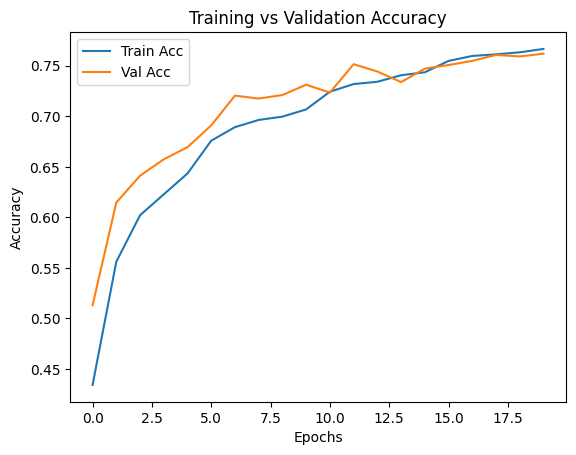

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
